# Multiscale Analysis of Production of 1,3PDO and 3HP from Biomass
## Stage 3. Bioprocess Scale Analysis: Calculating Process Energy Cost

In [1]:
%reset -f
%load_ext autoreload
%autoreload 2
from __future__ import division

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 3.1 Calculating Process Energy Cost: Assuming Multi-Stage Evaporation

In [2]:
import numpy
import cPickle as pickle

from cbmTES import energy
from cbmTES.biochemical import Ei
from cbmTES.global_constants import *

performances = pickle.load(open('jar/performances_gram.pickle', 'rb'))

E_fermentation = OrderedDict()
E_separation = OrderedDict()
E_purification = OrderedDict()

energy_cost_per_substrate = OrderedDict()
energy_cost_per_product = OrderedDict()

fermentation_cost_per_product = OrderedDict()
separation_cost_per_product = OrderedDict()
purification_cost_per_product = OrderedDict()

process_energy_cost={}

mu = OrderedDict()
Y_B = OrderedDict()
Y_X = OrderedDict()
T = OrderedDict()
P = OrderedDict()

for key, performance in performances.items():
    
    mu[key] = numpy.array([p['growth_rate'] for p in performance])[1:-1] # hr-1
    Y_B[key] = numpy.array([p['product_yield'] for p in performance])[1:-1] #kg/kg
    Y_X[key] = numpy.array([p['biomass_yield'] for p in performance])[1:-1] #kg/kg
    T[key] = numpy.array([p['product_titer'] for p in performance])[1:-1]/1000 #kg/L
    P[key] = numpy.array([p['productivity'] for p in performance])[1:-1]/1000 #kg/L/hr
    
    # calculate energy of fermentation (MJ / g of substrate)
    if key[1] == AEROBIC:
        E_fermentation[key] = Ei['sterilization']*Y_B[key]/T[key] + Ei['agitation']*Y_B[key]/P[key] + Ei['aeration']*Y_B[key]/P[key]
    elif key[1] == ANAEROBIC:
        E_fermentation[key] = Ei['sterilization']*Y_B[key]/T[key] + Ei['agitation']*Y_B[key]/P[key]
    
    # calculate energy of seperation (assuming centrifugation) is used (MJ / g of substrate)
    if key[0] == 'ecoli':
        E_separation[key] = Ei['centrifugation_bacteria']*Y_B[key]/T[key]
    elif key[0] == 'scere':
        E_separation[key] = Ei['centrifugation_yeast']*Y_B[key]/T[key]
    
    # calculate energy of purification (assuming multistage evaporation is used) (MJ / g of substrate)
    E_purification[key] = Ei['evaporation_multi_stage']*Y_B[key]/T[key]
    
    energy_cost_per_substrate[key] = E_fermentation[key] + E_separation[key] + E_purification[key]
    energy_cost_per_product[key] = energy_cost_per_substrate[key]/Y_B[key]
    
    fermentation_cost_per_product[key] = E_fermentation[key]/Y_B[key]
    separation_cost_per_product[key] = E_separation[key]/Y_B[key]
    purification_cost_per_product[key] = E_purification[key]/Y_B[key]
        
process_energy_cost['energy_cost_per_substrate']= energy_cost_per_substrate
process_energy_cost['energy_cost_per_product']= energy_cost_per_product
process_energy_cost['growth_rate']=mu

process_energy_cost['fermentation_cost_per_product']= fermentation_cost_per_product
process_energy_cost['separation_cost_per_product']= separation_cost_per_product
process_energy_cost['purification_cost_per_product']= purification_cost_per_product

pickle.dump(process_energy_cost,  open('jar/process_energy_cost_multi_stage.pickle','wb'))

## 3.2 Calculating Process Energy Cost: Assuming Single-Stage Evaporation

In [3]:
performances = pickle.load(open('jar/performances_gram.pickle', 'rb'))

E_fermentation = OrderedDict()
E_separation = OrderedDict()
E_purification = OrderedDict()

energy_cost_per_substrate = OrderedDict()
energy_cost_per_product = OrderedDict()

fermentation_cost_per_product = OrderedDict()
separation_cost_per_product = OrderedDict()
purification_cost_per_product = OrderedDict()

process_energy_cost={}

mu = OrderedDict()
Y_B = OrderedDict()
Y_X = OrderedDict()
T = OrderedDict()
P = OrderedDict()

for key, performance in performances.items():
    
    mu[key] = numpy.array([p['growth_rate'] for p in performance])[1:-1] # hr-1
    Y_B[key] = numpy.array([p['product_yield'] for p in performance])[1:-1] #kg/kg
    Y_X[key] = numpy.array([p['biomass_yield'] for p in performance])[1:-1] #kg/kg
    T[key] = numpy.array([p['product_titer'] for p in performance])[1:-1]/1000 #kg/L
    P[key] = numpy.array([p['productivity'] for p in performance])[1:-1]/1000 #kg/L/hr
    
    # calculate energy of fermentation (MJ / g of substrate)
    if key[1] == AEROBIC:
        E_fermentation[key] = Ei['sterilization']*Y_B[key]/T[key] + Ei['agitation']*Y_B[key]/P[key] + Ei['aeration']*Y_B[key]/P[key]
    elif key[1] == ANAEROBIC:
        E_fermentation[key] = Ei['sterilization']*Y_B[key]/T[key] + Ei['agitation']*Y_B[key]/P[key]
    
    # calculate energy of seperation (assuming centrifugation) is used (MJ / g of substrate)
    if key[0] == 'ecoli':
        E_separation[key] = Ei['centrifugation_bacteria']*Y_B[key]/T[key]
    elif key[0] == 'scere':
        E_separation[key] = Ei['centrifugation_yeast']*Y_B[key]/T[key]
    
    # calculate energy of purification (assuming multistage evaporation is used) (MJ / g of substrate)
    E_purification[key] = Ei['evaporation_single_stage']*Y_B[key]/T[key]
    
    energy_cost_per_substrate[key] = E_fermentation[key] + E_separation[key] + E_purification[key]
    energy_cost_per_product[key] = energy_cost_per_substrate[key]/Y_B[key]
    
    fermentation_cost_per_product[key] = E_fermentation[key]/Y_B[key]
    separation_cost_per_product[key] = E_separation[key]/Y_B[key]
    purification_cost_per_product[key] = E_purification[key]/Y_B[key]
        
process_energy_cost['energy_cost_per_substrate']= energy_cost_per_substrate
process_energy_cost['energy_cost_per_product']= energy_cost_per_product
process_energy_cost['growth_rate']=mu

process_energy_cost['fermentation_cost_per_product']= fermentation_cost_per_product
process_energy_cost['separation_cost_per_product']= separation_cost_per_product
process_energy_cost['purification_cost_per_product']= purification_cost_per_product

pickle.dump(process_energy_cost,  open('jar/process_energy_cost_single_stage.pickle','wb'))

## 3.3 Bioprocess Scale Analysis: Energy Consumption Comparisons

In [4]:
process_energy_cost_1stage = pickle.load(open('jar/process_energy_cost_single_stage.pickle','rb'))
energy_cost_per_product_1stage = process_energy_cost_1stage['energy_cost_per_product']
fermentation_cost_per_product_1stage = process_energy_cost_1stage['fermentation_cost_per_product']
separation_cost_per_product_1stage = process_energy_cost_1stage['separation_cost_per_product']
purification_cost_per_product_1stage = process_energy_cost_1stage['purification_cost_per_product']

process_energy_cost_Mstage = pickle.load(open('jar/process_energy_cost_multi_stage.pickle','rb'))
energy_cost_per_product_Mstage = process_energy_cost_Mstage['energy_cost_per_product']
fermentation_cost_per_product_Mstage = process_energy_cost_Mstage['fermentation_cost_per_product']
separation_cost_per_product_Mstage = process_energy_cost_Mstage['separation_cost_per_product']
purification_cost_per_product_Mstage = process_energy_cost_Mstage['purification_cost_per_product']

mu = process_energy_cost_Mstage['growth_rate']  #growth rate is the same for multi_stage and single_stage simulations

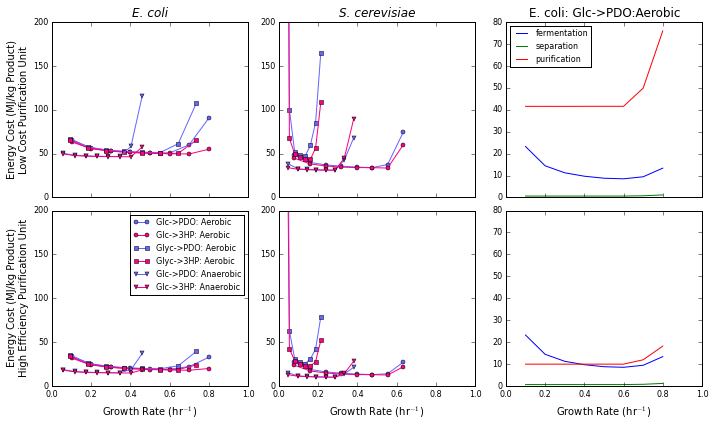

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(1,figsize = (10, 6))
plt.hold(True)

legend = []

for key in energy_cost_per_product_1stage.keys():
    # setting line color, line type, marker, and legend

    if key[2] == r_glc:
        substrate = 'Glc'
        if key[1] == AEROBIC:  
            marker = 'o'
            condition = 'Aerobic'
        elif key[1] == ANAEROBIC:
            marker = 'v'
            condition = 'Anaerobic'
    else:
        marker = 's'
        substrate = 'Glyc'
        condition = 'Aerobic'
       
    if key[3] == r_3HPP:
        line_color = '#ff0080'
        
        product = '3HP'
    elif key[3] == r_13PDO:
        line_color = '#6666ff'
        product = 'PDO'
        
       
    if key[0] == 'ecoli':
        plt.subplot(2,3,1)
        plt.title('E. coli',{'fontstyle':'italic'})
        plt.plot(mu[key],energy_cost_per_product_1stage[key], color=line_color, linestyle='-', marker=marker, markersize = 4)
        plt.ylim([0, 200])
        plt.xlim([0, 1])
        plt.tick_params(labelbottom='off') 
        plt.ylabel('Energy Cost (MJ/kg Product)\nLow Cost Purification Unit')
    
        plt.subplot(2,3,4)
        plt.plot(mu[key],energy_cost_per_product_Mstage[key], color=line_color, linestyle='-', marker=marker, markersize = 4)
        plt.ylim([0, 200])
        plt.xlim([0, 1])
        plt.ylabel('Energy Cost (MJ/kg Product)\nHigh Efficiency Purification Unit')
        plt.xlabel(r'Growth Rate (hr$^{-1}$)')
        
    if key[0] == 'scere':
        plt.subplot(2,3,2)
        plt.title('S. cerevisiae',{'fontstyle':'italic'})
        plt.plot(mu[key],energy_cost_per_product_1stage[key], color=line_color, linestyle='-', marker=marker, markersize = 4)
        plt.ylim([0, 200])
        plt.xlim([0, 1])
        plt.tick_params(labelbottom='off') 
    
        plt.subplot(2,3,5)
        plt.plot(mu[key],energy_cost_per_product_Mstage[key], color=line_color, linestyle='-', marker=marker,  markersize = 4)
        plt.ylim([0, 200])
        plt.xlim([0, 1])
        plt.tick_params()     
        
        plt.xlabel(r'Growth Rate (hr$^{-1}$)')
    
    legend.append(substrate+'->'+product+': '+condition)

# Plotting individual costs of fermentation, separation, purification
k = ('ecoli', AEROBIC, 'R_EX_glc_e', 'R_EX_13PDO_e')        
plt.subplot(2,3,3)
plt.title('E. coli: Glc->PDO:Aerobic')
plt.hold(True)
plt.plot(mu[k],fermentation_cost_per_product_1stage[k])
plt.plot(mu[k],separation_cost_per_product_1stage[k])
plt.plot(mu[k],purification_cost_per_product_1stage[k])
plt.tick_params(labelbottom='off') 
plt.ylim([0, 80])
plt.xlim([0, 1])
plt.legend(['fermentation','separation','purification'],fontsize=8, loc = 2)

plt.subplot(2,3,6)
key = ('ecoli', AEROBIC, 'R_EX_glc_e', 'R_EX_13PDO_e')        
plt.hold(True)
plt.plot(mu[k],fermentation_cost_per_product_Mstage[k])
plt.plot(mu[k],separation_cost_per_product_Mstage[k])
plt.plot(mu[k],purification_cost_per_product_Mstage[k])
plt.ylim([0, 80])
plt.xlim([0, 1])
plt.xlabel(r'Growth Rate (hr$^{-1}$)')
legend.append(substrate+'->'+product+': '+condition)

# set figure properties
for i in [1,2,3,4,5,6]:
    ax = plt.subplot(2,3,i)
    ax.xaxis.label.set_fontsize(10)
    ax.yaxis.label.set_fontsize(10)
    ax.tick_params(labelsize=8)
plt.tight_layout(w_pad=0.7,h_pad=0.5)

plt.subplot(2,3,4)
plt.legend(legend, fontsize=8, loc =1)

plt.savefig('figures/process_energy.png', dpi=300)
plt.savefig('figures/process_energy.svg', dpi=300)

In [6]:
for x in energy_cost_per_product_1stage:
    print size( energy_cost_per_product_1stage[x])


8
8
8
8
8
8
8
8
8
8
8
8
